# Investigating the Impact of Augmented Reality in Machine Operation Training: A Case Study on Laser-Cutting Machines - Data analysis

## Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import plot_likert
import matplotlib.pyplot as plt
import pingouin as pg

from scipy import stats
from pandas.api.types import CategoricalDtype

Define the path to files

In [2]:
pathTimeAR = "./Data/ARgroup-AllInd.xlsx"
pathTimeControl = "./Data/ControlGroup-AllInd.xlsx"

Read files

In [3]:
dataAR = pd.read_excel(pathTimeAR)
dataControl = pd.read_excel(pathTimeControl)
dataAll = pd.concat([dataAR, dataControl])

Encode Likert scale for inferential stats

In [4]:
# arExperienceScalet = {'Never':0,'Rarely':1,'Sometimes':2,'Moderately':3,'Regularly':4,'VeryRegularly':5}
# machineryExpScale = ['None','Very Little','Little','Moderately Familiar','Familiar','Very Familiar']

utilityScale = {'Useless':1, 'Scarcely useful':2, 'Moderately useful':3, 'Almost useful':4, 'Useful':5}
reprodAloneScale = {'Unable':1, 'Barely able':2, 'Moderately able':3, 'Almost able':4, 'Completely able':5}
clarityScale = {'Not at all clear':1, 'Not much clear':2, 'Understandable':3, 'Very clear':4, 'Limpid':5}
explicaNeedScale = {'Never':1, 'Rarely':2, 'Sometimes':3, 'Often':4, 'Always':5}
easeUsageScale = {'Very difficult':1, 'Difficult':2, 'Neutral':3, 'Easy':4, 'Very easy':5}
structureScale = {'Very messy':1, 'Messy':2, 'Understandable':3, 'Clear':4, 'Very clear':5}

utilityAfterReprodScale = {'Useless':1, 'Scarcely useful':2, 'Moderately useful':3, 'Almost useful':4, 'Useful':5}
sufficientScale = {'Not at all':1,'Very little':2,'More or less':3,'Rather':4,'Totally':5}
selfPerformanceScale = {'Bad':1,'Poor':2,'Average':3,'Good':4,'Excellent':5}

In [5]:
dataAll['UtilityEncoded'] = dataAll['Utility'].replace(utilityScale)

dataAll['ReprodAloneEncoded'] = dataAll['ReprodAlone'].replace(reprodAloneScale)
dataAll['ClarityEncoded'] = dataAll['Clarity'].replace(clarityScale)
dataAll['ExplicaNeedEncoded'] = dataAll['ExplicaNeed'].replace(explicaNeedScale)

dataAll['UtilityAfterReprodEncoded'] = dataAll['UtilityAfterReprod'].replace(utilityAfterReprodScale)
dataAll['SufficientEncoded'] = dataAll['Sufficient'].replace(sufficientScale)
dataAll['SelfPerformanceEncoded'] = dataAll['SelfPerformance'].replace(selfPerformanceScale)

dataAll['EaseUsageEncoded'] = dataAll['EaseUsage'].replace(easeUsageScale)
dataAll['StructureEncoded'] = dataAll['Structure'].replace(structureScale)

Define category type to columns that correcpond to it. 

In [6]:
# method inspired by https://benalexkeen.com/mapping-categorical-data-in-pandas/
arExperienceCat = ['Never','Rarely','Sometimes','Moderately','Regularly','VeryRegularly']
machineryExpCat = ['No','Very Little','Little','Moderately familiar','Familiar','Very Familiar']

utilityCat = ['Useless', 'Scarcely useful', 'Moderately useful', 'Almost useful', 'Useful']
reprodAloneCat = ['Unable', 'Barely able', 'Moderately able', 'Almost able', 'Completely able']
clarityCat = ['Not at all clear', 'Not much clear', 'Understandable', 'Very clear', 'Limpid']
explicaNeedCat = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
easeUsageCat = ['Very difficult', 'Difficult', 'Neutral', 'Easy', 'Very easy']
structureCat = ['Very messy', 'Messy', 'Understandable', 'Clear', 'Very clear']

utilityAfterReprodCat = ['Useless', 'Scarcely useful', 'Moderately useful', 'Almost useful', 'Useful']
sufficientCat = ['Not at all','Very little','More or less','Rather','Totally']
selfPerformanceCat = ['Bad','Poor','Average','Good','Excellent']


In [7]:
arExperience_dtype = CategoricalDtype(categories=arExperienceCat, ordered=True)
machineryExp_dtype = CategoricalDtype(categories=machineryExpCat, ordered=True)

utility_dtype = CategoricalDtype(categories=utilityCat, ordered=True)
reprodAloneCat_dtype = CategoricalDtype(categories=reprodAloneCat, ordered=True)
clarityCat_dtype = CategoricalDtype(categories=clarityCat, ordered=True)
explicaNeedCat_dtype = CategoricalDtype(categories=explicaNeedCat, ordered=True)
easeUsageCat_dtype = CategoricalDtype(categories=easeUsageCat, ordered=True)
structureCat_dtype = CategoricalDtype(categories=structureCat, ordered=True)

utilityAfterReprodCat_dtype = CategoricalDtype(categories=utilityAfterReprodCat, ordered=True)
sufficientCat_dtype = CategoricalDtype(categories=sufficientCat, ordered=True)
selfPerformanceCat_dtype = CategoricalDtype(categories=selfPerformanceCat, ordered=True)

dataAll['ARexperience-cat'] = dataAll['ARexperience-cat'].astype(arExperience_dtype)
dataAll['MachineryExp-cat'] = dataAll['MachineryExp-cat'].astype(machineryExp_dtype)

dataAll['Utility'] = dataAll['Utility'].astype(utility_dtype)
dataAll['ReprodAlone'] = dataAll['ReprodAlone'].astype(reprodAloneCat_dtype)
dataAll['Clarity'] = dataAll['Clarity'].astype(clarityCat_dtype)
dataAll['ExplicaNeed'] = dataAll['ExplicaNeed'].astype(explicaNeedCat_dtype)
dataAll['EaseUsage'] = dataAll['EaseUsage'].astype(easeUsageCat_dtype)
dataAll['Structure'] = dataAll['Structure'].astype(structureCat_dtype)

dataAll['UtilityAfterReprod'] = dataAll['UtilityAfterReprod'].astype(utilityAfterReprodCat_dtype)
dataAll['Sufficient'] = dataAll['Sufficient'].astype(sufficientCat_dtype)
dataAll['SelfPerformance'] = dataAll['SelfPerformance'].astype(selfPerformanceCat_dtype)

In [8]:
#normalizing scale to simplify plot rendering
normalizedScale = {1:'Strongly disagree', 2:'Disagree', 3:'Neither agree nor disagree', 4:'Agree',5:'Strongly agree'}
normalizedCat = ['Strongly disagree','Disagree', 'Neither agree nor disagree', 'Agree','Strongly agree']
normalized_dtype = CategoricalDtype(categories=normalizedCat, ordered=True)

dataAll['UtilityNormScale'] = dataAll['UtilityEncoded'].replace(normalizedScale)
dataAll['ReprodAloneNormScale'] = dataAll['ReprodAloneEncoded'].replace(normalizedScale)
dataAll['ClarityNormScale'] = dataAll['ClarityEncoded'].replace(normalizedScale)
dataAll['ExplicaNeedNormScale'] = dataAll['ExplicaNeedEncoded'].replace(normalizedScale)

dataAll['UtilityAfterReprodNormScale'] = dataAll['UtilityAfterReprodEncoded'].replace(normalizedScale)
dataAll['SufficientNormScale'] = dataAll['SufficientEncoded'].replace(normalizedScale)
dataAll['SelfPerformanceNormScale'] = dataAll['SelfPerformanceEncoded'].replace(normalizedScale)

dataAll['EaseUsageNormScale'] = dataAll['EaseUsageEncoded'].replace(normalizedScale)
dataAll['StructureNormScale'] = dataAll['StructureEncoded'].replace(normalizedScale)

dataAll['UtilityNormScale']=dataAll['UtilityNormScale'].astype(normalized_dtype)
dataAll['ReprodAloneNormScale']=dataAll['ReprodAloneNormScale'].astype(normalized_dtype)
dataAll['ClarityNormScale']=dataAll['ClarityNormScale'].astype(normalized_dtype)
dataAll['ExplicaNeedNormScale']=dataAll['ExplicaNeedNormScale'].astype(normalized_dtype)

dataAll['UtilityAfterReprodNormScale']=dataAll['UtilityAfterReprodNormScale'].astype(normalized_dtype)
dataAll['SufficientNormScale']= dataAll['SufficientNormScale'].astype(normalized_dtype)
dataAll['SelfPerformanceNormScale'] = dataAll['SelfPerformanceNormScale'].astype(normalized_dtype)

dataAll['EaseUsageNormScale'] = dataAll['EaseUsageNormScale'].astype(normalized_dtype)
dataAll['StructureNormScale'] = dataAll['StructureNormScale'].astype(normalized_dtype)

In [9]:
def cohens_d(group1, group2):
    # Calculating means of the two groups
    mean1, mean2 = np.mean(group1), np.mean(group2)
     
    # Calculating pooled standard deviation
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))
     
    # Calculating Cohen's d
    d = (mean1 - mean2) / pooled_std
     
    return d

In [10]:
def z_value(group1, group2, U):
    n1, n2 = len(group1), len(group2)

    mu_u= n1 * n2 /2
    sigma_u= np.sqrt((n1*n2*(n1+n2+1))/12)

    z_value = (U-mu_u)/sigma_u
    return z_value

## Participants description
Age and number of participants according to their group and their gender

In [11]:
dataAll.groupby(['Gender'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,45.0,22.111111,3.491693,18.0,20.0,21.0,23.0,35.0
Male,45.0,22.088889,5.648098,18.0,20.0,21.0,22.0,53.0


In [12]:
dataAll.groupby(['Group', 'Gender'])['Age'].describe()


count       mean       std   min   25%   50%   75%   max
Group   Gender                                                          
AR      Female   20.0  22.000000  3.670652  18.0  20.0  21.0  23.0  33.0
        Male     19.0  22.210526  4.366272  18.0  19.5  21.0  22.5  34.0
Control Female   25.0  22.200000  3.415650  19.0  20.0  21.0  23.0  35.0
        Male     26.0  22.000000  6.511528  19.0  20.0  20.5  21.0  53.0

Overall age distribution

In [13]:
dataAll['Age'].describe()

count    90.000000
mean     22.100000
std       4.668927
min      18.000000
25%      20.000000
50%      21.000000
75%      22.000000
max      53.000000
Name: Age, dtype: float64

Background of particpants 

In [14]:
dataAll['Background'].value_counts()

Background
Industrial engineering                      47
Design                                      19
Engineering                                  5
Mechanical engineering                       3
Industrial Design                            1
Marketing                                    1
Project management, computer science         1
Mathematic and computer science              1
Cognitives science                           1
Innovation management engineering            1
Chemical engineering                         1
Computer science                             1
Humanities                                   1
Third place management                       1
Communication                                1
Management                                   1
Foreign language, international relation     1
Electrical engineering                       1
Architecture & urbanism                      1
Name: count, dtype: int64

Remove participants who did not completed the reproduction.

In [15]:
dataAllSuccess = dataAll.loc[dataAll['Completed'] == 'yes']
dataControlSuccess = dataAllSuccess.loc[dataAllSuccess['Group'] == 'Control']
dataARSuccess = dataAllSuccess.loc[dataAllSuccess['Group'] == 'AR']

## Sample

Participants with previous AR experience

In [16]:
pd.crosstab(dataAllSuccess['Group'], dataAllSuccess['ARexperience-cat'])

ARexperience-cat,Never,Rarely,Sometimes,Moderately
Group,,,,
AR,23,11,2,1
Control,39,12,0,0


Participants with previous machinery handling experience

In [17]:
pd.crosstab(dataAllSuccess['Group'], dataAllSuccess['MachineryExp-cat'])

MachineryExp-cat,No,Very Little,Little,Moderately familiar,Familiar,Very Familiar
Group,,,,,,
AR,25,4,4,2,1,1
Control,30,9,9,3,0,0


## Results

### Tasks completion time

C:\Users\gabriel2\AppData\Local\Temp\ipykernel_34416\2853423870.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([dataControlSuccess['Time'], dataARSuccess['Time']], labels=['Control', 'AR'])


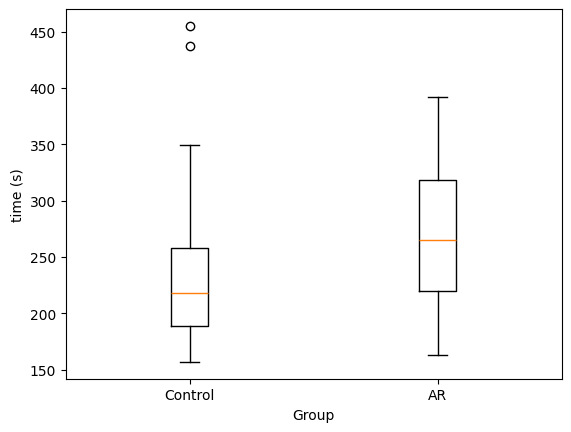

In [20]:
fig, ax = plt.subplots()
ax.boxplot([dataControlSuccess['Time'], dataARSuccess['Time']], labels=['Control', 'AR'])
ax.set_ylabel('time (s)')
ax.set_xlabel('Group')
plt.show()

Calculate the confidence interval for time for each participant group

In [21]:
# https://www.statology.org/confidence-intervals-python/
controlTimeIC = stats.t.interval(0.95, df=len(dataControlSuccess['Time'])-1, loc=dataControlSuccess['Time'].mean(), scale=stats.sem(dataControlSuccess['Time'])) 
arTimeIC = stats.t.interval(0.95, df=len(dataARSuccess['Time'])-1, loc=dataARSuccess['Time'].mean(), scale=stats.sem(dataARSuccess['Time'])) 
timeIC = [ abs(arTimeIC[0] - dataARSuccess['Time'].mean()), abs(controlTimeIC[0] - dataControlSuccess['Time'].mean())]
timeIC

[21.64219029558319, 17.968848953827006]

In [22]:
# https://www.statology.org/confidence-intervals-python/ 
controlTimeIC = stats.norm.interval(0.95, loc=dataControlSuccess['Time'].mean(), scale=stats.sem(dataControlSuccess['Time'])) 
arTimeIC = stats.norm.interval(0.95, loc=dataARSuccess['Time'].mean(), scale=stats.sem(dataARSuccess['Time'])) 
timeIC= [ abs(arTimeIC[0] - dataARSuccess['Time'].mean()), abs(controlTimeIC[0] - dataControlSuccess['Time'].mean())]
timeIC

[20.91516147939842, 17.534110189222247]

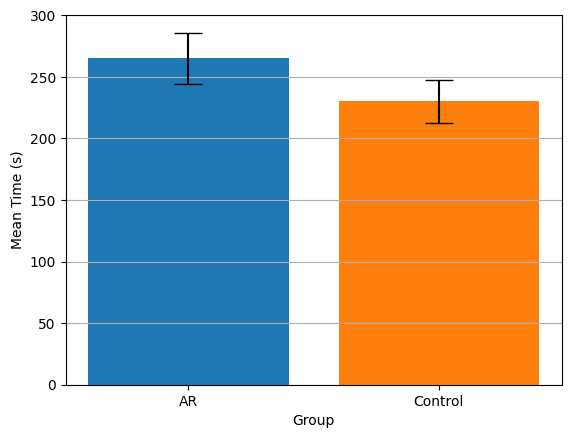

In [23]:
groupcolor = ['tab:blue', 'tab:orange']
fig, ax = plt.subplots()
ax.bar(groupedDatadescription.index.to_list(), groupedDatadescription['Time']['mean'], yerr=timeIC, align='center', color=groupcolor ,ecolor='black', capsize=10)
ax.set_xticks(groupedDatadescription.index.to_list())
ax.set_ylabel('Mean Time (s)')
ax.set_xlabel('Group')
ax.yaxis.grid(True)

#### Statistical test

In [24]:
controlGp = dataAllSuccess.loc[dataAllSuccess['Group']=="Control"]
ARGp = dataAllSuccess.loc[dataAllSuccess['Group']=="AR"]

__Student test__

•	H1.1null - Participants in the AR group, who engage in hands-on learning through the AR application, will show similar task completion time, compared to the Control group, who learn through observing an instructor. 
•   H1.1alt - Participants in the AR group, will show reduced task completion time, compared to the Control group, who learn through observing an instructor.

In [160]:
pg.ttest(controlGp['Time'], ARGp['Time'], alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.490731,77.000444,greater,0.992549,"[-57.87, inf]",0.539252,0.154,0.000019


According the inital hypothesis, the null hypothesis can not be rejected. It means the AR group i not faster. Accordin to the previous plot, it can be assumed it is the oposite. 

In [161]:
pg.ttest(controlGp['Time'], ARGp['Time'], alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.490731,77.000444,less,0.007451,"[-inf, -11.5]",0.539252,6.481,0.797444


The AR group is significantly slower than the control group.

#### Sub group exploration (prior experience)

##### Considering prior AR experience

In [28]:
dataARexperience = dataAllSuccess.groupby(['Group','ARexperience'])
dataARexperienceDesc = dataARexperience['Time'].describe()
dataARexperienceDesc

count        mean        std    min     25%    50%  \
Group   ARexperience                                                       
AR      No             23.0  262.652174  69.983510  163.0  209.00  262.0   
        Yes            14.0  268.642857  57.925160  185.0  226.25  272.5   
Control No             39.0  230.923077  70.331315  157.0  183.50  217.0   
        Yes            12.0  228.000000  38.186147  161.0  200.00  228.5   

                        75%    max  
Group   ARexperience                
AR      No            319.5  392.0  
        Yes           300.5  390.0  
Control No            245.5  455.0  
        Yes           263.0  277.0

Calculate the confidence interval for reproduction error done by participants durintg the reproduction phase for each group

In [ ]:
controlTimeWithoutARexpeIC = stats.norm.interval(0.95, loc=dataARexperienceDesc['mean'].loc[('Control', 'No')], scale=dataARexperience['Time'].sem().loc[('Control', 'No')]) 
controlTimeWithARexpeIC = stats.norm.interval(0.95, loc=dataARexperienceDesc['mean'].loc[('Control', 'Yes')], scale=dataARexperience['Time'].sem().loc[('Control', 'Yes')]) 
arTimeWithoutARExpeIC = stats.norm.interval(0.95, loc=dataARexperienceDesc['mean'].loc[('AR', 'No')], scale=dataARexperience['Time'].sem().loc[('AR', 'No')]) 
arTimeWithARExpeIC = stats.norm.interval(0.95, loc=dataARexperienceDesc['mean'].loc[('AR', 'Yes')], scale=dataARexperience['Time'].sem().loc[('Control', 'Yes')]) 
arExpTimeIC= [ abs(arTimeWithoutARExpeIC[0] - dataARexperienceDesc['mean'].loc[('AR', 'No')]), abs(arTimeWithARExpeIC[0] - dataARexperienceDesc['mean'].loc[('AR', 'Yes')]), abs(controlTimeWithoutARexpeIC[0] - dataARexperienceDesc['mean'].loc[('Control', 'No')]), abs(controlTimeWithARexpeIC[0] - dataARexperienceDesc['mean'].loc[('Control', 'Yes')])]
arExpTimeIC

[28.600912862055907,
 21.605449558753975,
 22.073160827567165,
 21.605449558753975]

In [30]:
# label for the graph
groups= []
for gptuple in dataARexperienceDesc.index.to_list():
    name = '-'.join(gptuple)
    groups.append(name)

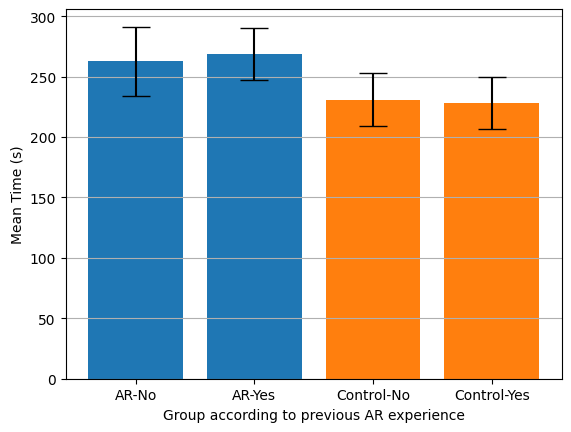

In [31]:
groupcolor = ['tab:blue','tab:blue', 'tab:orange','tab:orange']
fig, ax = plt.subplots()
ax.bar(groups, dataARexperienceDesc['mean'], yerr=arExpTimeIC, align='center', color=groupcolor ,ecolor='black', capsize=10)
ax.set_xticks(groups)
ax.set_ylabel('Mean Time (s)')
ax.set_xlabel('Group according to previous AR experience')
ax.yaxis.grid(True)

##### Considering prior machinery handling experience

In [38]:
dataMachineryExp = dataAllSuccess.groupby(['Group','MachineryExp'])
dataMachineryExpDescribe = dataMachineryExp['Time'].describe()
dataMachineryExpDescribe

count        mean        std    min     25%    50%  \
Group   MachineryExp                                                       
AR      No             24.0  257.958333  69.559158  163.0  206.75  235.0   
        Yes            13.0  277.769231  55.592496  185.0  226.00  276.0   
Control No             30.0  239.633333  74.637738  157.0  195.25  219.0   
        Yes            21.0  216.809524  42.483666  160.0  186.00  209.0   

                         75%    max  
Group   MachineryExp                 
AR      No            318.75  392.0  
        Yes           306.00  390.0  
Control No            262.75  455.0  
        Yes           245.00  330.0

In [39]:
# https://www.statology.org/confidence-intervals-python/ 
controlTimeWithoutMachinExpeIC = stats.t.interval(0.95, loc=dataMachineryExpDescribe['mean'].loc[('Control', 'No')], df=len(controlGp.loc[controlGp['MachineryExp']=='No'])-1, scale=dataMachineryExp['Time'].sem().loc[('Control', 'No')]) 
controlTimeWithMachinExpeIC = stats.t.interval(0.95, loc=dataMachineryExpDescribe['mean'].loc[('Control', 'Yes')], df=len(controlGp.loc[controlGp['MachineryExp']=='Yes'])-1, scale=dataMachineryExp['Time'].sem().loc[('Control', 'Yes')]) 
arTimeWithoutMachinExpeIC = stats.t.interval(0.95, loc=dataMachineryExpDescribe['mean'].loc[('AR', 'No')], df=len(ARGp.loc[ARGp['MachineryExp']=='No'])-1, scale=dataMachineryExp['Time'].sem().loc[('AR', 'No')]) 
arTimeWithMachinExpeIC = stats.t.interval(0.95, loc=dataMachineryExpDescribe['mean'].loc[('AR', 'Yes')], df=len(ARGp.loc[ARGp['MachineryExp']=='Yes'])-1, scale=dataMachineryExp['Time'].sem().loc[('Control', 'Yes')]) 
machExpTimeIC= [ abs(arTimeWithoutMachinExpeIC[0] - dataMachineryExpDescribe['mean'].loc[('AR', 'No')]), abs(arTimeWithMachinExpeIC[0] - dataMachineryExpDescribe['mean'].loc[('AR', 'Yes')]), abs(controlTimeWithoutMachinExpeIC[0] - dataMachineryExpDescribe['mean'].loc[('Control', 'No')]), abs(controlTimeWithMachinExpeIC[0] - dataMachineryExpDescribe['mean'].loc[('Control', 'Yes')])]
machExpTimeIC

[29.37225636700441, 20.199111462765416, 27.870189453638602, 19.338333061443336]

In [40]:
machineryExpeGroups= []
for gptuple in dataMachineryExpDescribe.index.to_list():
    name = '-'.join(gptuple)
    machineryExpeGroups.append(name)

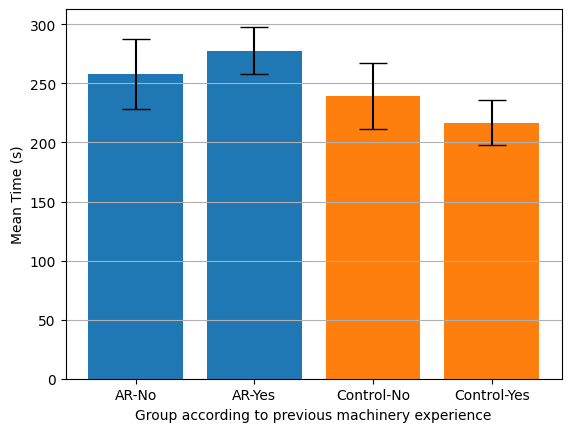

In [41]:
machineryGroupColor = ['tab:blue'] *2 + ['tab:orange'] *2
fig, ax = plt.subplots()
ax.bar(machineryExpeGroups, dataMachineryExpDescribe['mean'], yerr=machExpTimeIC, align='center', color=machineryGroupColor ,ecolor='black', capsize=10)
# ax.set_xticks(Groups)
ax.set_ylabel('Mean Time (s)')
ax.set_xlabel('Group according to previous machinery experience')
ax.yaxis.grid(True)

##### Considering no prior AR & Machinery experience

In [47]:
ARgpNoARexp = ARGp.loc[ARGp['ARexperience']=="No"]
ARgpNoExpAtAll = ARgpNoARexp.loc[ARgpNoARexp['MachineryExp']=="No"]

ctlGpNoARexp = controlGp.loc[controlGp['ARexperience']=="No"]
ctlGpNoExpAtAll = ctlGpNoARexp.loc[ctlGpNoARexp['MachineryExp']=="No"]


In [48]:
ARgpNoExpAtAllIC = stats.t.interval(0.95, loc=ARgpNoExpAtAll['Time'].mean(), df=len(ARgpNoExpAtAll['Time'])-1, scale=ARgpNoExpAtAll['Time'].sem()) 
ctlGpNoExpAtAllIC = stats.t.interval(0.95, loc=ctlGpNoExpAtAll['Time'].mean(), df=len(ctlGpNoExpAtAll['Time'])-1, scale=ctlGpNoExpAtAll['Time'].sem())
noExpTimeIc = [ abs(ARgpNoExpAtAllIC[0]-ARgpNoExpAtAll['Time'].mean()),abs( ctlGpNoExpAtAllIC[0] - ctlGpNoExpAtAll['Time'].mean())] 
noExpTimeIc

[38.84362959362869, 34.53991137709639]

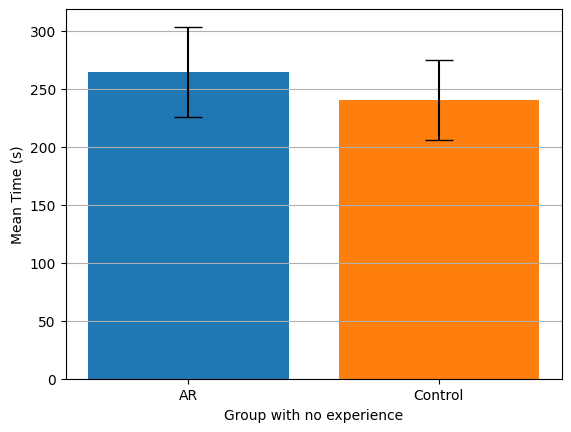

In [49]:
noExpeCatGroups = ['AR' , 'Control']
groupcolor = ['tab:blue'] + ['tab:orange'] 
fig, ax = plt.subplots()
# ax.bar(machineryExpeCatGroups, dataMachineryExpCatDescribe['mean'], yerr=dataMachineryExpCatDescribe['std'], align='center', color=groupcolor ,ecolor='black', capsize=10)
ax.bar(noExpeCatGroups, [ARgpNoExpAtAll['Time'].mean(), ctlGpNoExpAtAll['Time'].mean()], yerr= noExpTimeIc, align='center', color=groupcolor ,ecolor='black', capsize=10)
ax.set_ylabel('Mean Time (s)')
ax.set_xlabel('Group with no experience')
ax.yaxis.grid(True)

### Performance indicators

In [60]:
dataARSuccessStd = dataARSuccess.std(numeric_only=True)[['Help','Disorder','Error']]
dataControlSuccessStd = dataControlSuccess.std(numeric_only=True)[['Help','Disorder','Error']]

In [61]:
# order of the list : Help, disorder, error conficende interval 
arObjIndIC = [helpIC[0],disorderIC[0],errorIC[0]]
controlObjIndIC = [helpIC[1],disorderIC[1],errorIC[1]]

In [62]:
dataARSuccessMean =dataARSuccess.mean(numeric_only=True)[['Help','Disorder','Error']]
dataControlSuccessMean = dataControlSuccess.mean(numeric_only=True)[['Help','Disorder','Error']]

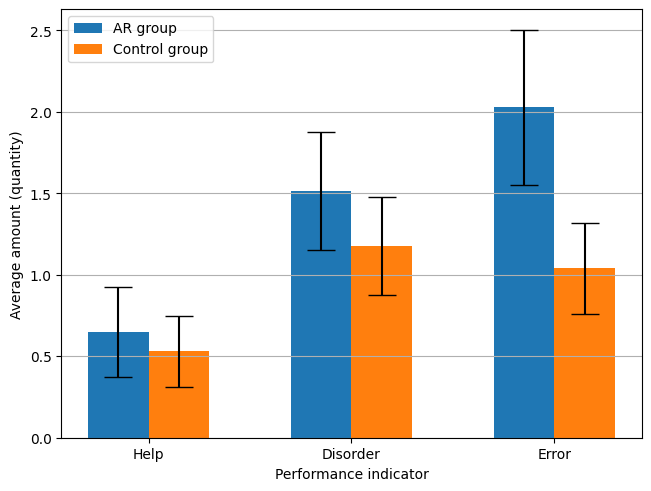

In [63]:
#fig = plt.figure(figsize=(16,8))
#ax = fig.add_subplot(111)
fig, ax = plt.subplots(layout='constrained')

Error_Types = np.array(['Help', 'Disorder', 'Error'])
X_Axis =  np.arange(len(Error_Types))

AR_rect = ax.bar(X_Axis - 0.15, dataARSuccessMean, yerr = arObjIndIC, width = 0.3, label = "AR group",align='center',ecolor='black', capsize=10)
Control_rect = ax.bar(X_Axis + 0.15, dataControlSuccessMean, yerr = controlObjIndIC, width = 0.3, label = "Control group", align='center', ecolor='black', capsize=10)


ax.set_xticks(X_Axis, Error_Types)
ax.set_ylabel("Average amount (quantity)")
ax.set_xlabel("Performance indicator")
# ax.bar_label(Control_rect)
# ax.bar_label(AR_rect)
ax.legend(loc = 'upper left')
ax.yaxis.grid(True)
plt.show()

#### Statistical test

•	H1.2null - Participants in the AR group, who engage in hands-on learning through the AR application, make as many errors as the Control group, who learn through observing an instructor. 
•	H1.2alt - Participants in the AR group, will make fewer errors, compared to the Control group.

In [165]:
objective_data = pd.DataFrame({"AR mean": dataARSuccess[["Help","Disorder","Error"]].mean(), "AR SD": dataARSuccess[["Help","Disorder","Error"]].std(), "Control mean": dataControlSuccess[["Help","Disorder","Error"]].mean(), "Control SD": dataControlSuccess[["Help","Disorder","Error"]].std() }) 

ttest_list_p = []
ttest_list_t = []
ttest_list_d = []
for index in ["Help","Disorder","Error"]: 
    ttest_res = pg.ttest(dataControlSuccess[index], dataARSuccess[index], alternative="greater")
    ttest_list_p.append(ttest_res['p-val']['T-test'])
    ttest_list_t.append(ttest_res['T']['T-test'])
    ttest_list_d.append(ttest_res['cohen-d']['T-test'])
objective_data['p-value'] = ttest_list_p
objective_data['t-value'] = ttest_list_t
objective_data['cohens d'] = ttest_list_d

objective_data

,AR mean,AR SD,Control mean,Control SD,p-value,t-value,cohens d
Help,0.648649,0.856875,0.529412,0.783657,0.746807,-0.667748,0.146284
Disorder,1.513514,1.121052,1.176471,1.090062,0.918473,-1.408446,0.305530
Error,2.027027,1.481112,1.039216,1.019035,0.999558,-3.500096,0.800686


#### Sub group exploration

##### Considering no prior AR & Machinery experience

In [67]:
ARgpNoExpAtAllDescription = ARgpNoExpAtAll.describe()
ctlGpNoExpAtAllDescription = ctlGpNoExpAtAll.describe()

In [68]:
# confidence interval calculation 
controlNoExpeHelpIC = stats.norm.interval(0.95, loc=ctlGpNoExpAtAllDescription['Help']['mean'], scale=stats.sem(ctlGpNoExpAtAll['Help'])) 
arNoExpHelpIC = stats.norm.interval(0.95, loc=ARgpNoExpAtAllDescription['Help']['mean'], scale=stats.sem(ARgpNoExpAtAll['Help'])) 
helpNoExpeIC= [ abs(arNoExpHelpIC[0] - ARgpNoExpAtAllDescription['Help']['mean']), abs(controlNoExpeHelpIC[0] - ctlGpNoExpAtAllDescription['Help']['mean'])]

controlNoExpeDisorderIC = stats.norm.interval(0.95, loc=ctlGpNoExpAtAllDescription['Disorder']['mean'], scale=stats.sem(ctlGpNoExpAtAll['Disorder'])) 
arNoExpDisorderIC = stats.norm.interval(0.95, loc=ARgpNoExpAtAllDescription['Disorder']['mean'], scale=stats.sem(ARgpNoExpAtAll['Disorder'])) 
disorderNoExpeIC= [ abs(arNoExpDisorderIC[0] - ARgpNoExpAtAllDescription['Disorder']['mean']), abs(controlNoExpeDisorderIC[0] - ctlGpNoExpAtAllDescription['Disorder']['mean'])]

controlNoExpeErrorIC = stats.norm.interval(0.95, loc=ctlGpNoExpAtAllDescription['Error']['mean'], scale=stats.sem(ctlGpNoExpAtAll['Error'])) 
arNoExpErrorIC = stats.norm.interval(0.95, loc=ARgpNoExpAtAllDescription['Error']['mean'], scale=stats.sem(ARgpNoExpAtAll['Error'])) 
errorNoExpeIC= [ abs(arNoExpDisorderIC[0] - ARgpNoExpAtAllDescription['Error']['mean']), abs(controlNoExpeErrorIC[0] - ctlGpNoExpAtAllDescription['Error']['mean'])]

In [69]:
# order of the list : Help, disorder, error conficende interval 
arObjNoExpIndIC = [helpNoExpeIC[0],disorderNoExpeIC[0],errorNoExpeIC[0]]
controlObjNoExpIndIC = [helpNoExpeIC[1],disorderNoExpeIC[1],errorNoExpeIC[1]]

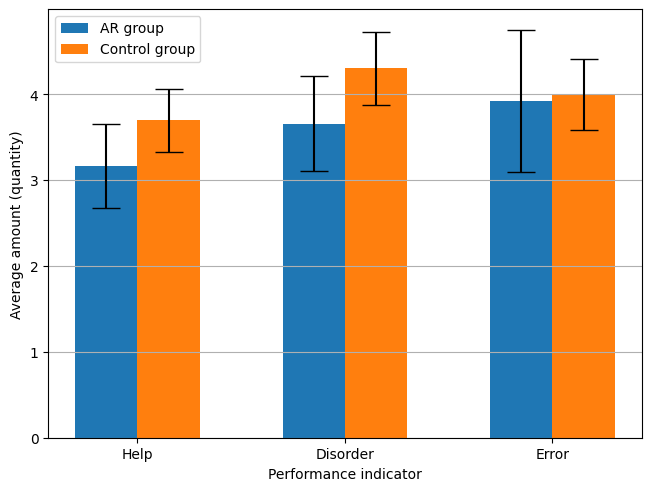

In [70]:
fig, ax = plt.subplots(layout='constrained')

Error_Types = np.array(['Help', 'Disorder', 'Error'])
X_Axis =  np.arange(len(Error_Types))

AR_rect = ax.bar(X_Axis - 0.15, ARgpNoExpAtAllDescription.mean(numeric_only=True)[['Help','Disorder','Error']], yerr = arObjNoExpIndIC, width = 0.3, label = "AR group",align='center',ecolor='black', capsize=10)
Control_rect = ax.bar(X_Axis + 0.15, ctlGpNoExpAtAllDescription.mean(numeric_only=True)[['Help','Disorder','Error']], yerr = controlObjNoExpIndIC, width = 0.3, label = "Control group", align='center', ecolor='black', capsize=10)


ax.set_xticks(X_Axis, Error_Types)
ax.set_ylabel("Average amount (quantity)")
ax.set_xlabel("Performance indicator")
# ax.bar_label(Control_rect)
# ax.bar_label(AR_rect)
ax.legend(loc = 'upper left')
ax.yaxis.grid(True)
plt.show()

Statistical test

In [170]:
objective_data_no_exp = pd.DataFrame({"AR mean": ARgpNoExpAtAll[["Help","Disorder","Error"]].mean(), "AR SD": ARgpNoExpAtAll[["Help","Disorder","Error"]].std(), "Control mean": ctlGpNoExpAtAll[["Help","Disorder","Error"]].mean(), "Control SD": ctlGpNoExpAtAll[["Help","Disorder","Error"]].std() }) 

ttest_list_p_no_exp = []
ttest_list_t_no_exp = []
ttest_list_d_no_exp = []
ttest_list_power_no_exp = []
for index in ["Help","Disorder","Error"]: 
    ttest_res = pg.ttest(ctlGpNoExpAtAll[index], ARgpNoExpAtAll[index], alternative="less")
    ttest_list_p_no_exp.append(ttest_res['p-val']['T-test'])
    ttest_list_t_no_exp.append(ttest_res['T']['T-test'])
    ttest_list_d_no_exp.append(ttest_res['cohen-d']['T-test'])
    ttest_list_power_no_exp.append(ttest_res['power']['T-test'])
objective_data_no_exp['p-value'] = ttest_list_p_no_exp
objective_data_no_exp['t-value'] = ttest_list_t_no_exp
objective_data_no_exp['cohens d'] = ttest_list_d_no_exp
objective_data_no_exp['power'] = ttest_list_power_no_exp
objective_data_no_exp

,AR mean,AR SD,Control mean,Control SD,p-value,t-value,cohens d,power
Help,0.777778,1.060275,0.666667,0.916831,0.362078,-0.355879,0.113337,0.098964
Disorder,1.555556,1.199128,1.375000,1.055524,0.307352,-0.508041,0.161382,0.127980
Error,1.833333,1.543487,0.958333,1.041703,0.023544,-2.076474,0.683999,0.695492


## Subjective measurment

### Post Training

#### Overall Data with all particpants

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\Lib\site-packages\plot_likert\plot_likert.py:314: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


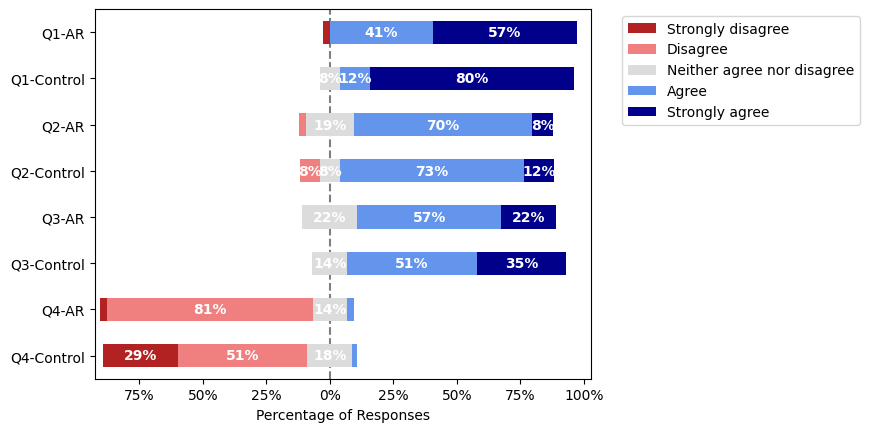

In [82]:
plot_likert.plot_likert(pd.DataFrame({'Q1-AR':dataARSuccess['UtilityNormScale'],
                                      'Q1-Control':dataControlSuccess['UtilityNormScale'], 
                                      'Q2-AR':dataARSuccess['ReprodAloneNormScale'],
                                      'Q2-Control':dataControlSuccess['ReprodAloneNormScale'],
                                      'Q3-AR':dataARSuccess['ClarityNormScale'],
                                      'Q3-Control':dataControlSuccess['ClarityNormScale'],
                                      'Q4-AR':dataARSuccess['ExplicaNeedNormScale'],
                                      'Q4-Control':dataControlSuccess['ExplicaNeedNormScale']}), normalizedCat, bar_labels = True, plot_percentage=True)
plt.show()


In [83]:
after_training_data = pd.DataFrame({"AR mean": dataARSuccess[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].mean(), "AR SD": dataARSuccess[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].std(), "Control mean": dataControlSuccess[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].mean(), "Control SD": dataControlSuccess[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].std() }) 

mannwhitneyu_list_p = []
mannwhitneyu_list_t = []
for index in ["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]: 
    mannwhitneyu_list_p.append(stats.mannwhitneyu(dataARSuccess[index], dataControlSuccess[index]).pvalue)
    mannwhitneyu_list_t.append(stats.mannwhitneyu(dataARSuccess[index], dataControlSuccess[index]).statistic)
after_training_data['Mann Whitney U p-value'] = mannwhitneyu_list_p
after_training_data['Mann Whitney U t-value'] = mannwhitneyu_list_t

cohens_d_list = []
for index in ["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]: 
    cohens_d_list.append(cohens_d(dataARSuccess[index], dataControlSuccess[index]))
after_training_data['cohens d'] = cohens_d_list
after_training_data

,AR mean,AR SD,Control mean,Control SD,Mann Whitney U p-value,Mann Whitney U t-value,cohens d
UtilityEncoded,4.486486,0.768173,4.725490,0.602609,0.036414,745.5,-0.353106
ReprodAloneEncoded,3.837838,0.601550,3.882353,0.711254,0.482112,877.0,-0.066686
ClarityEncoded,4.000000,0.666667,4.215686,0.672718,0.137031,784.0,-0.321828
ExplicaNeedEncoded,2.162162,0.500750,1.921569,0.744127,0.073007,1125.5,0.368232


In [84]:
after_training_data = pd.DataFrame({"AR mean": dataARSuccess[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].mean(), "AR SD": dataARSuccess[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].std(), "Control mean": dataControlSuccess[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].mean(), "Control SD": dataControlSuccess[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].std() }) 

mannwhitneyu_list_p = []
mannwhitneyu_list_z = []
mannwhitneyu_list_effect_size = []
for index in ["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]: 
    mwu_res = pg.mwu(dataARSuccess[index], dataControlSuccess[index])
    mannwhitneyu_list_p.append(mwu_res['p-val']['MWU'])
    mannwhitneyu_list_z.append(z_value(dataARSuccess[index], dataControlSuccess[index], mwu_res['U-val']['MWU']))
    mannwhitneyu_list_effect_size.append(mwu_res['CLES']['MWU'])
after_training_data['p-value'] = mannwhitneyu_list_p
after_training_data['z-value'] = mannwhitneyu_list_z
after_training_data['effect size'] = mannwhitneyu_list_effect_size

after_training_data.round(2)

,AR mean,AR SD,Control mean,Control SD,p-value,z-value,effect size
UtilityEncoded,4.49,0.77,4.73,0.60,0.04,-1.67,0.40
ReprodAloneEncoded,3.84,0.60,3.88,0.71,0.48,-0.56,0.46
ClarityEncoded,4.00,0.67,4.22,0.67,0.14,-1.35,0.42
ExplicaNeedEncoded,2.16,0.50,1.92,0.74,0.07,1.54,0.60


#### Overall Data with inexperience particpants 

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\Lib\site-packages\plot_likert\plot_likert.py:314: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


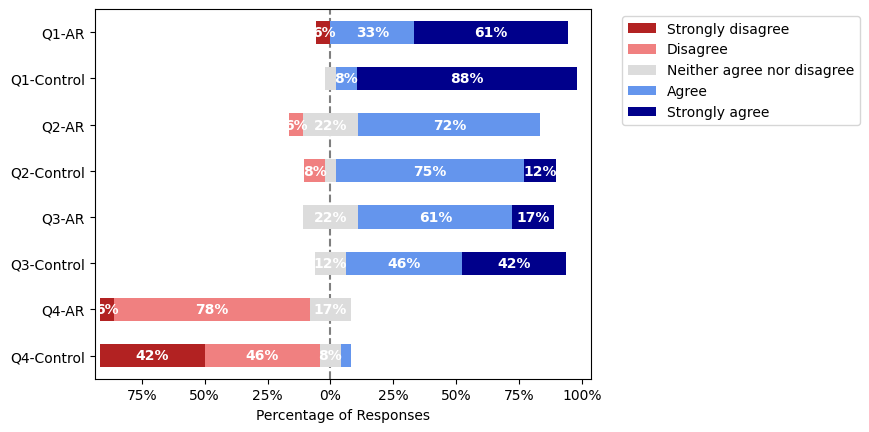

In [87]:
plot_likert.plot_likert(pd.DataFrame({'Q1-AR':ARgpNoExpAtAll['UtilityNormScale'],
                                      'Q1-Control':ctlGpNoExpAtAll['UtilityNormScale'], 
                                      'Q2-AR':ARgpNoExpAtAll['ReprodAloneNormScale'],
                                      'Q2-Control':ctlGpNoExpAtAll['ReprodAloneNormScale'],
                                      'Q3-AR':ARgpNoExpAtAll['ClarityNormScale'],
                                      'Q3-Control':ctlGpNoExpAtAll['ClarityNormScale'],
                                      'Q4-AR':ARgpNoExpAtAll['ExplicaNeedNormScale'],
                                      'Q4-Control':ctlGpNoExpAtAll['ExplicaNeedNormScale']}), normalizedCat, bar_labels = True, plot_percentage=True)
plt.show()

In [88]:
after_training_data_NoExAtAll = pd.DataFrame({"AR mean": ARgpNoExpAtAll[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].mean(), "AR SD": ARgpNoExpAtAll[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].std(), "Control mean": ctlGpNoExpAtAll[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].mean(), "Control SD": ctlGpNoExpAtAll[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].std() }) 

mannwhitneyu_list_p_NoExAtAll = []
mannwhitneyu_list_t_NoExAtAll = []
for index in ["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]: 
    mannwhitneyu_list_p_NoExAtAll.append(stats.mannwhitneyu(ARgpNoExpAtAll[index], ctlGpNoExpAtAll[index]).pvalue)
    mannwhitneyu_list_t_NoExAtAll.append(stats.mannwhitneyu(ARgpNoExpAtAll[index], ctlGpNoExpAtAll[index]).statistic)
after_training_data_NoExAtAll['Mann Whitney U p-value'] = mannwhitneyu_list_p_NoExAtAll
after_training_data_NoExAtAll['Mann Whitney U t-value'] = mannwhitneyu_list_t_NoExAtAll

cohens_d_list_NoExAtAll = []
for index in ["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]: 
    cohens_d_list_NoExAtAll.append(cohens_d(ARgpNoExpAtAll[index], ctlGpNoExpAtAll[index]))
after_training_data_NoExAtAll['cohens d'] = cohens_d_list_NoExAtAll
after_training_data_NoExAtAll

,AR mean,AR SD,Control mean,Control SD,Mann Whitney U p-value,Mann Whitney U t-value,cohens d
UtilityEncoded,4.444444,0.983524,4.833333,0.481543,0.059691,160.5,-0.527046
ReprodAloneEncoded,3.666667,0.594089,3.916667,0.717282,0.110270,167.0,-0.374415
ClarityEncoded,3.944444,0.639137,4.291667,0.690253,0.098226,156.5,-0.519012
ExplicaNeedEncoded,2.111111,0.471405,1.750000,0.793999,0.038345,288.0,0.534206


In [89]:
after_training_data_NoExAtAll = pd.DataFrame({"AR mean": ARgpNoExpAtAll[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].mean(), "AR SD": ARgpNoExpAtAll[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].std(), "Control mean": ctlGpNoExpAtAll[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].mean(), "Control SD": ctlGpNoExpAtAll[["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]].std() }) 

mannwhitneyu_list_p_NoExAtAll = []
mannwhitneyu_list_z_NoExAtAll  = []
mannwhitneyu_list_effect_size_NoExAtAll  = []
for index in ["UtilityEncoded","ReprodAloneEncoded","ClarityEncoded","ExplicaNeedEncoded"]: 
    mwu_res = pg.mwu(ARgpNoExpAtAll[index], ctlGpNoExpAtAll[index])
    mannwhitneyu_list_p_NoExAtAll.append(mwu_res['p-val']['MWU'])
    mannwhitneyu_list_z_NoExAtAll .append(z_value(ARgpNoExpAtAll[index], ctlGpNoExpAtAll[index], mwu_res['U-val']['MWU']))
    mannwhitneyu_list_effect_size_NoExAtAll .append(mwu_res['CLES']['MWU'])
after_training_data_NoExAtAll['p-value'] = mannwhitneyu_list_p_NoExAtAll
after_training_data_NoExAtAll['z-value'] = mannwhitneyu_list_z_NoExAtAll 
after_training_data_NoExAtAll['effect size'] = mannwhitneyu_list_effect_size_NoExAtAll 

after_training_data_NoExAtAll.round(2)

,AR mean,AR SD,Control mean,Control SD,p-value,z-value,effect size
UtilityEncoded,4.44,0.98,4.83,0.48,0.06,-1.41,0.37
ReprodAloneEncoded,3.67,0.59,3.92,0.72,0.11,-1.25,0.39
ClarityEncoded,3.94,0.64,4.29,0.69,0.10,-1.51,0.36
ExplicaNeedEncoded,2.11,0.47,1.75,0.79,0.04,1.83,0.67


#### Analysis of the percpetion of AR experience

In [111]:
dataARSuccess[['EaseUsageEncoded','StructureEncoded']].describe()

,EaseUsageEncoded,StructureEncoded
count,37.000000,37.000000
mean,4.216216,4.378378
std,0.534121,0.681149
min,3.000000,3.000000
25%,4.000000,4.000000
50%,4.000000,4.000000
75%,5.000000,5.000000
max,5.000000,5.000000


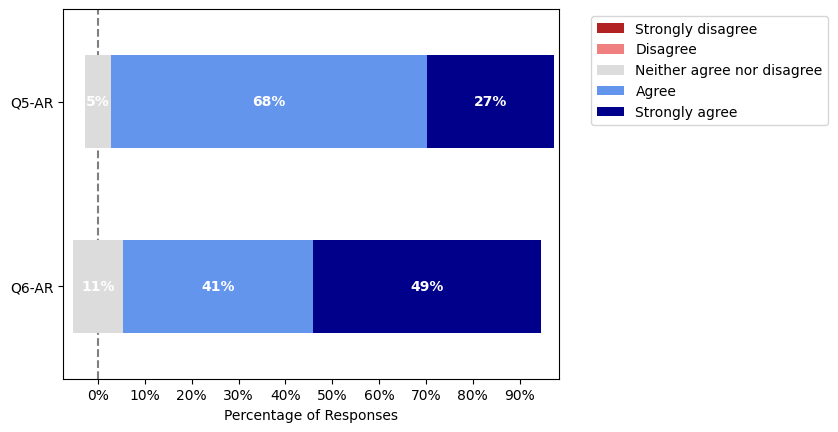

In [113]:
plot_likert.plot_likert(pd.DataFrame({'Q5-AR':dataARSuccess['EaseUsageNormScale'],
                                      'Q6-AR':dataARSuccess['StructureNormScale'],
                                      }), normalizedCat, bar_labels = True, plot_percentage=True)
plt.show()

In [114]:
AR_expe_data = pd.DataFrame({"AR mean": dataARSuccess[["EaseUsageEncoded","StructureEncoded"]].mean(), "AR SD": dataARSuccess[["EaseUsageEncoded","StructureEncoded"]].std() }) 
AR_expe_data

,AR mean,AR SD
EaseUsageEncoded,4.216216,0.534121
StructureEncoded,4.378378,0.681149


In [115]:
AR_expe_mwu_res = pg.mwu(dataARSuccess["EaseUsageEncoded"], dataARSuccess["StructureEncoded"])
AR_expe_mwu_res["z-value"] = z_value(dataARSuccess["EaseUsageEncoded"], dataARSuccess["StructureEncoded"], AR_expe_mwu_res['U-val']['MWU'])
AR_expe_mwu_res

,U-val,alternative,p-val,RBC,CLES,z-value
MWU,571.5,two-sided,0.170525,0.165084,0.417458,-1.221622


In [116]:
AR_expe_mwu_res = pg.mwu(dataARSuccess["EaseUsageEncoded"], dataARSuccess["StructureEncoded"], alternative='less')
AR_expe_mwu_res["z-value"] = z_value(dataARSuccess["EaseUsageEncoded"], dataARSuccess["StructureEncoded"], AR_expe_mwu_res['U-val']['MWU'])
AR_expe_mwu_res

,U-val,alternative,p-val,RBC,CLES,z-value
MWU,571.5,less,0.085262,0.165084,0.582542,-1.221622


### Post evaluation

#### Overall data with all participants

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\Lib\site-packages\plot_likert\plot_likert.py:314: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


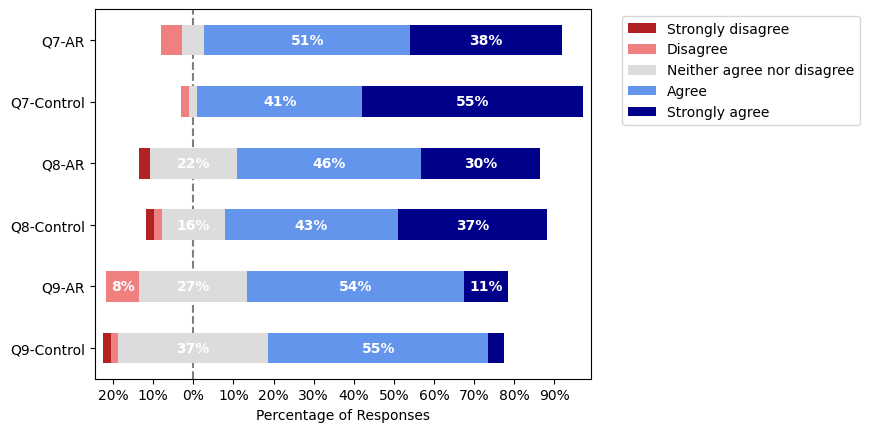

In [118]:
plot_likert.plot_likert(pd.DataFrame({'Q7-AR':dataARSuccess['UtilityAfterReprodNormScale'],
                                      'Q7-Control':dataControlSuccess['UtilityAfterReprodNormScale'],
                                      'Q8-AR':dataARSuccess['SufficientNormScale'],
                                      'Q8-Control':dataControlSuccess['SufficientNormScale'],
                                      'Q9-AR':dataARSuccess['SelfPerformanceNormScale'],
                                      'Q9-Control':dataControlSuccess['SelfPerformanceNormScale']}), normalizedCat, bar_labels = True, plot_percentage=True)
plt.show()

In [119]:
after_eval_data = pd.DataFrame({"AR mean": dataARSuccess[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].mean(), "AR SD": dataARSuccess[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].std(), "Control mean": dataControlSuccess[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].mean(), "Control SD": dataControlSuccess[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].std() }) 

mannwhitneyu_list_p = []
mannwhitneyu_list_z = []
mannwhitneyu_list_effect = []
for index in ["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]:
    mwu_res = pg.mwu(dataARSuccess[index], dataControlSuccess[index])
    mannwhitneyu_list_p.append(mwu_res['p-val']['MWU'])
    mannwhitneyu_list_z.append(z_value(dataARSuccess[index], dataControlSuccess[index], mwu_res['U-val']['MWU']))
    mannwhitneyu_list_effect.append(mwu_res['CLES']['MWU'])
after_eval_data['p-value'] = mannwhitneyu_list_p
after_eval_data['z-value'] = mannwhitneyu_list_z
after_eval_data['effect size'] = mannwhitneyu_list_effect
after_eval_data.round(2)

,AR mean,AR SD,Control mean,Control SD,p-value,z-value,effect size
UtilityAfterReprodEncoded,4.22,0.79,4.49,0.64,0.08,-1.56,0.40
SufficientEncoded,4.00,0.88,4.12,0.89,0.46,-0.69,0.46
SelfPerformanceEncoded,3.68,0.78,3.57,0.70,0.48,0.64,0.54


In [120]:
after_eval_data = pd.DataFrame({"AR mean": dataARSuccess[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].mean(), "AR SD": dataARSuccess[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].std(), "Control mean": dataControlSuccess[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].mean(), "Control SD": dataControlSuccess[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].std() }) 

mannwhitneyu_list_p = []
mannwhitneyu_list_t = []
cohens_d_list = []
for index in ["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]: 
    mannwhitneyu_list_p.append(stats.mannwhitneyu(dataARSuccess[index], dataControlSuccess[index]).pvalue)
    mannwhitneyu_list_t.append(stats.mannwhitneyu(dataARSuccess[index], dataControlSuccess[index]).statistic)
    cohens_d_list.append(cohens_d(dataARSuccess[index], dataControlSuccess[index]))
after_eval_data['Mann Whitney U p-value'] = mannwhitneyu_list_p
after_eval_data['Mann Whitney U t-value'] = mannwhitneyu_list_t
after_eval_data['cohens d'] = cohens_d_list
after_eval_data

,AR mean,AR SD,Control mean,Control SD,Mann Whitney U p-value,Mann Whitney U t-value,cohens d
UtilityAfterReprodEncoded,4.216216,0.786523,4.490196,0.644129,0.082380,759.5,-0.387397
SufficientEncoded,4.000000,0.881917,4.117647,0.886500,0.462245,862.0,-0.132997
SelfPerformanceEncoded,3.675676,0.783654,3.568627,0.700140,0.475964,1019.5,0.145396


#### Overall data with inexperience participants

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\Lib\site-packages\plot_likert\plot_likert.py:314: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


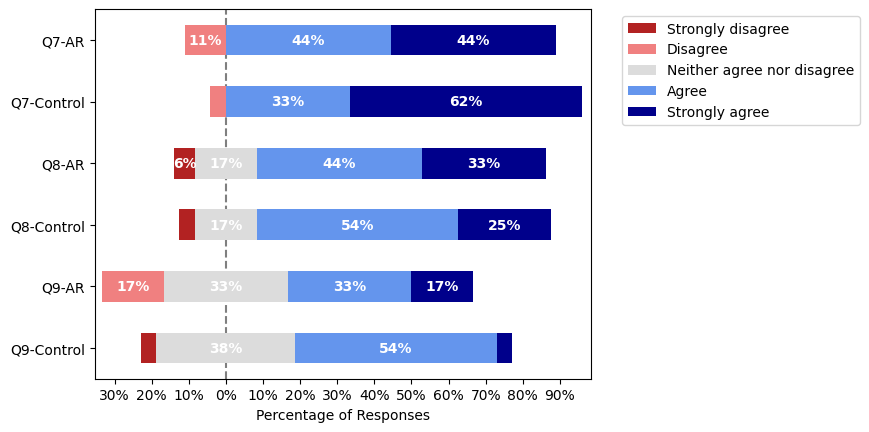

In [123]:
plot_likert.plot_likert(pd.DataFrame({'Q7-AR':ARgpNoExpAtAll['UtilityAfterReprodNormScale'],
                                      'Q7-Control':ctlGpNoExpAtAll['UtilityAfterReprodNormScale'],
                                      'Q8-AR':ARgpNoExpAtAll['SufficientNormScale'],
                                      'Q8-Control':ctlGpNoExpAtAll['SufficientNormScale'],
                                      'Q9-AR':ARgpNoExpAtAll['SelfPerformanceNormScale'],
                                      'Q9-Control':ctlGpNoExpAtAll['SelfPerformanceNormScale']}), normalizedCat, bar_labels = True, plot_percentage=True)
plt.show()

In [124]:
after_eval_data_NoExAtAll = pd.DataFrame({"AR mean": ARgpNoExpAtAll[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].mean(), "AR SD": ARgpNoExpAtAll[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].std(), "Control mean": ctlGpNoExpAtAll[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].mean(), "Control SD": ctlGpNoExpAtAll[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].std() }) 

mannwhitneyu_list_p_NoExAtAll = []
mannwhitneyu_list_z_NoExAtAll = []
mannwhitneyu_list_effect_NoExAtAll = []
for index in ["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]:
    mwu_res = pg.mwu(ARgpNoExpAtAll[index], ctlGpNoExpAtAll[index])
    mannwhitneyu_list_p_NoExAtAll.append(mwu_res['p-val']['MWU'])
    mannwhitneyu_list_z_NoExAtAll.append(z_value(ARgpNoExpAtAll[index], ctlGpNoExpAtAll[index], mwu_res['U-val']['MWU']))
    mannwhitneyu_list_effect_NoExAtAll.append(mwu_res['CLES']['MWU'])
after_eval_data_NoExAtAll['p-value'] = mannwhitneyu_list_p_NoExAtAll
after_eval_data_NoExAtAll['z-value'] = mannwhitneyu_list_z_NoExAtAll
after_eval_data_NoExAtAll['effect size'] = mannwhitneyu_list_effect_NoExAtAll
after_eval_data_NoExAtAll.round(2)

,AR mean,AR SD,Control mean,Control SD,p-value,z-value,effect size
UtilityAfterReprodEncoded,4.22,0.94,4.54,0.72,0.22,-1.09,0.40
SufficientEncoded,4.00,1.03,3.96,0.91,0.76,0.29,0.53
SelfPerformanceEncoded,3.50,0.99,3.54,0.78,0.78,-0.27,0.48


In [125]:
after_eval_data_NoExAtAll = pd.DataFrame({"AR mean": ARgpNoExpAtAll[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].mean(), "AR SD": ARgpNoExpAtAll[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].std(), "Control mean": ctlGpNoExpAtAll[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].mean(), "Control SD": ctlGpNoExpAtAll[["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]].std() }) 

mannwhitneyu_list_p_NoExAtAll = []
mannwhitneyu_list_t_NoExAtAll = []
cohens_d_list_NoExAtAll = []
for index in ["UtilityAfterReprodEncoded","SufficientEncoded","SelfPerformanceEncoded"]: 
    mannwhitneyu_list_p_NoExAtAll.append(stats.mannwhitneyu(ARgpNoExpAtAll[index], ctlGpNoExpAtAll[index]).pvalue)
    mannwhitneyu_list_t_NoExAtAll.append(stats.mannwhitneyu(ARgpNoExpAtAll[index], ctlGpNoExpAtAll[index]).statistic)
    cohens_d_list_NoExAtAll.append(cohens_d(ARgpNoExpAtAll[index], ctlGpNoExpAtAll[index]))
after_eval_data_NoExAtAll['Mann Whitney U p-value'] = mannwhitneyu_list_p_NoExAtAll
after_eval_data_NoExAtAll['Mann Whitney U t-value'] = mannwhitneyu_list_t_NoExAtAll
after_eval_data_NoExAtAll['cohens d'] = cohens_d_list_NoExAtAll
after_eval_data_NoExAtAll

,AR mean,AR SD,Control mean,Control SD,Mann Whitney U p-value,Mann Whitney U t-value,cohens d
UtilityAfterReprodEncoded,4.222222,0.942809,4.541667,0.721060,0.221466,173.0,-0.388316
SufficientEncoded,4.000000,1.028992,3.958333,0.907896,0.761349,227.5,0.043347
SelfPerformanceEncoded,3.500000,0.985184,3.541667,0.779028,0.784165,205.5,-0.047749


## Q1-Q7 Comparative utility before/after reproduction

### Within group comparison with all participants

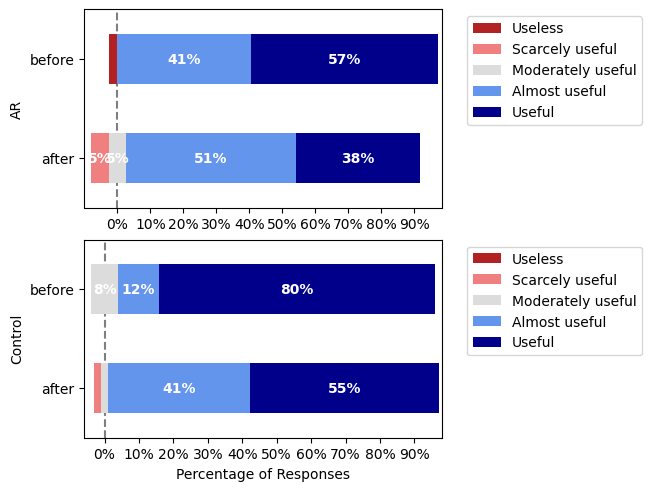

In [141]:
fig, axes = plt.subplots(nrows = 2, layout="constrained")

plot_likert.plot_likert(pd.DataFrame({'before':dataARSuccess['Utility'],'after':dataARSuccess['UtilityAfterReprod']}), utilityCat, bar_labels = True, plot_percentage=True, ax = axes[0])
plot_likert.plot_likert(pd.DataFrame({'before':dataControlSuccess['Utility'],'after':dataControlSuccess['UtilityAfterReprod']}), utilityCat, bar_labels = True, plot_percentage=True, ax = axes[1])

for i in range(1):
     axes[i].set_xlabel('')

axes[0].set_ylabel('AR')
axes[1].set_ylabel('Control')

plt.show()

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\Lib\site-packages\plot_likert\plot_likert.py:314: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


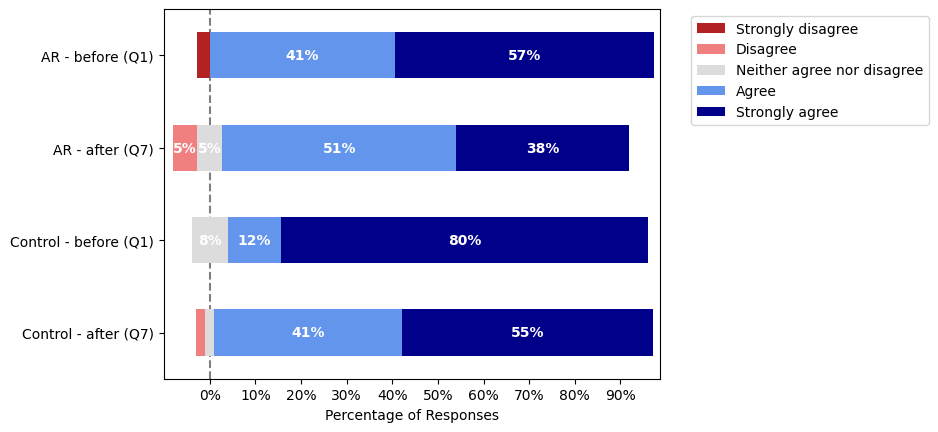

In [142]:
plot_likert.plot_likert(pd.DataFrame({'AR - before (Q1)':dataARSuccess['UtilityNormScale'],
                                      'AR - after (Q7)':dataARSuccess['UtilityAfterReprodNormScale'],
                                      'Control - before (Q1)':dataControlSuccess['UtilityNormScale'],
                                      'Control - after (Q7)':dataControlSuccess['UtilityAfterReprodNormScale']}), normalizedCat, bar_labels = True, plot_percentage=True)

plt.show()

Comparing group evaluation before and after evaluation session

In [143]:
within_group_data_labels=["UtilityEncoded","UtilityAfterReprodEncoded"]

within_group_data = pd.DataFrame({"AR mean": dataARSuccess[within_group_data_labels].mean(), "AR SD": dataARSuccess[within_group_data_labels].std(), "Control mean": dataControlSuccess[within_group_data_labels].mean(), "Control SD": dataControlSuccess[within_group_data_labels].std() }) 

mannwhitneyu_list_p = []
mannwhitneyu_list_z = []
mannwhitneyu_list_effect_size = []
for index in within_group_data_labels: 
    mwu_res = pg.mwu(dataARSuccess[index], dataControlSuccess[index])
    mannwhitneyu_list_p.append(mwu_res['p-val']['MWU'])
    mannwhitneyu_list_z.append(z_value(dataARSuccess[index], dataControlSuccess[index], mwu_res['U-val']['MWU']))
    mannwhitneyu_list_effect_size.append(mwu_res['CLES']['MWU'])
within_group_data['p-value'] = mannwhitneyu_list_p
within_group_data['z-value'] = mannwhitneyu_list_z
within_group_data['effect size'] = mannwhitneyu_list_effect_size

within_group_data.round(2)

,AR mean,AR SD,Control mean,Control SD,p-value,z-value,effect size
UtilityEncoded,4.49,0.77,4.73,0.60,0.04,-1.67,0.4
UtilityAfterReprodEncoded,4.22,0.79,4.49,0.64,0.08,-1.56,0.4


In [144]:
utility_AR_evolution = pg.mwu(dataARSuccess['UtilityAfterReprodEncoded'], dataARSuccess['UtilityEncoded'], alternative='less')
utility_AR_evolution['z-value'] = z_value(dataARSuccess['UtilityAfterReprodEncoded'], dataARSuccess['UtilityEncoded'], utility_AR_evolution['U-val']['MWU'])
utility_AR_evolution

,U-val,alternative,p-val,RBC,CLES,z-value
MWU,536.5,less,0.037064,0.216216,0.608108,-1.6


### Within group comparison with nonexperienced participants

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\Lib\site-packages\plot_likert\plot_likert.py:314: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


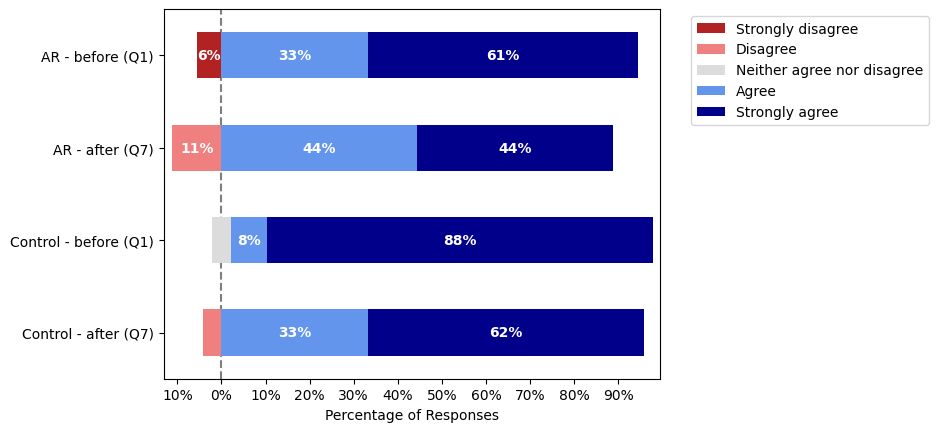

In [145]:
plot_likert.plot_likert(pd.DataFrame({'AR - before (Q1)':ARgpNoExpAtAll['UtilityNormScale'],
                                      'AR - after (Q7)':ARgpNoExpAtAll['UtilityAfterReprodNormScale'],
                                      'Control - before (Q1)':ctlGpNoExpAtAll['UtilityNormScale'],
                                      'Control - after (Q7)':ctlGpNoExpAtAll['UtilityAfterReprodNormScale']}), normalizedCat, bar_labels = True, plot_percentage=True)

plt.show()

In [146]:
within_group_data_labels=["UtilityEncoded","UtilityAfterReprodEncoded"]

within_group_data_NoExAtAll = pd.DataFrame({"AR mean": ARgpNoExpAtAll[within_group_data_labels].mean(), "AR SD": ARgpNoExpAtAll[within_group_data_labels].std(), "Control mean": ctlGpNoExpAtAll[within_group_data_labels].mean(), "Control SD": ctlGpNoExpAtAll[within_group_data_labels].std() }) 

mannwhitneyu_list_p_NoExAtAll = []
mannwhitneyu_list_z_NoExAtAll = []
mannwhitneyu_list_effect_size = []
for index in within_group_data_labels: 
    mwu_res = pg.mwu(ARgpNoExpAtAll[index], ctlGpNoExpAtAll[index])
    mannwhitneyu_list_p_NoExAtAll.append(mwu_res['p-val']['MWU'])
    mannwhitneyu_list_z_NoExAtAll.append(z_value(ARgpNoExpAtAll[index], ctlGpNoExpAtAll[index], mwu_res['U-val']['MWU']))
    mannwhitneyu_list_effect_size.append(mwu_res['CLES']['MWU'])
within_group_data_NoExAtAll['p-value'] = mannwhitneyu_list_p_NoExAtAll
within_group_data_NoExAtAll['z-value'] = mannwhitneyu_list_z_NoExAtAll
within_group_data_NoExAtAll['effect size'] = mannwhitneyu_list_effect_size

within_group_data_NoExAtAll.round(2)

,AR mean,AR SD,Control mean,Control SD,p-value,z-value,effect size
UtilityEncoded,4.44,0.98,4.83,0.48,0.06,-1.41,0.37
UtilityAfterReprodEncoded,4.22,0.94,4.54,0.72,0.22,-1.09,0.40


### Between group comparison
Comparing the evoluation of the evaluation within group

In [147]:
between_group_data_labels=["UtilityEncoded","UtilityAfterReprodEncoded"]

between_group_data = pd.DataFrame({"Before mean": [dataARSuccess["UtilityEncoded"].mean(), dataControlSuccess["UtilityEncoded"].mean()], "Before SD": [dataARSuccess["UtilityEncoded"].std() , dataControlSuccess["UtilityEncoded"].std()], "After mean": [dataARSuccess["UtilityAfterReprodEncoded"].mean(), dataControlSuccess["UtilityAfterReprodEncoded"].mean()], "After SD": [dataARSuccess["UtilityAfterReprodEncoded"].std(), dataControlSuccess["UtilityAfterReprodEncoded"].std()] }) 

mannwhitneyu_list_p = []
mannwhitneyu_list_z = []
mannwhitneyu_list_effect_size = []
#AR
mwu_res = pg.mwu(dataARSuccess["UtilityEncoded"], dataARSuccess["UtilityAfterReprodEncoded"])
mannwhitneyu_list_p.append(mwu_res['p-val']['MWU'])
mannwhitneyu_list_z.append(z_value(dataARSuccess["UtilityEncoded"], dataARSuccess["UtilityAfterReprodEncoded"], mwu_res['U-val']['MWU']))
mannwhitneyu_list_effect_size.append(mwu_res['CLES']['MWU'])

#Control 

mwu_res = pg.mwu(dataControlSuccess["UtilityEncoded"], dataControlSuccess["UtilityAfterReprodEncoded"])
mannwhitneyu_list_p.append(mwu_res['p-val']['MWU'])
mannwhitneyu_list_z.append(z_value(dataControlSuccess["UtilityEncoded"], dataControlSuccess["UtilityAfterReprodEncoded"], mwu_res['U-val']['MWU']))
mannwhitneyu_list_effect_size.append(mwu_res['CLES']['MWU'])

between_group_data['p-value'] = mannwhitneyu_list_p
between_group_data['z-value'] = mannwhitneyu_list_z
between_group_data['effect size'] = mannwhitneyu_list_effect_size


between_group_data.round(2)

,Before mean,Before SD,After mean,After SD,p-value,z-value,effect size
0,4.49,0.77,4.22,0.79,0.07,1.60,0.61
1,4.73,0.60,4.49,0.64,0.02,1.99,0.61


In [148]:
utility_after_evolution = pg.mwu(dataARSuccess['UtilityAfterReprodEncoded'], dataControlSuccess['UtilityAfterReprodEncoded'], alternative='less')
utility_after_evolution['z-value'] = z_value(dataARSuccess['UtilityAfterReprodEncoded'], dataControlSuccess['UtilityAfterReprodEncoded'], utility_after_evolution['U-val']['MWU'])
utility_after_evolution

,U-val,alternative,p-val,RBC,CLES,z-value
MWU,759.5,less,0.04119,0.195019,0.597509,-1.555348


### Between group comparison witn inexperienced particpants
Comparing the evoluation of the evaluation within group

In [149]:
between_group_data_labels=["UtilityEncoded","UtilityAfterReprodEncoded"]

between_group_data_NoExAtAll = pd.DataFrame({"Before mean": [ARgpNoExpAtAll["UtilityEncoded"].mean(), ctlGpNoExpAtAll["UtilityEncoded"].mean()], "Before SD": [ARgpNoExpAtAll["UtilityEncoded"].std() , ctlGpNoExpAtAll["UtilityEncoded"].std()], "After mean": [ARgpNoExpAtAll["UtilityAfterReprodEncoded"].mean(), ctlGpNoExpAtAll["UtilityAfterReprodEncoded"].mean()], "After SD": [ARgpNoExpAtAll["UtilityAfterReprodEncoded"].std(), ctlGpNoExpAtAll["UtilityAfterReprodEncoded"].std()] }) 

mannwhitneyu_list_p_NoExAtAll = []
mannwhitneyu_list_z_NoExAtAll = []
mannwhitneyu_list_effect_size_NoExAtAll = []
#AR
mwu_res = pg.mwu(ARgpNoExpAtAll["UtilityEncoded"], ARgpNoExpAtAll["UtilityAfterReprodEncoded"])
mannwhitneyu_list_p_NoExAtAll.append(mwu_res['p-val']['MWU'])
mannwhitneyu_list_z_NoExAtAll.append(z_value(ARgpNoExpAtAll["UtilityEncoded"], ARgpNoExpAtAll["UtilityAfterReprodEncoded"], mwu_res['U-val']['MWU']))
mannwhitneyu_list_effect_size_NoExAtAll.append(mwu_res['CLES']['MWU'])

#Control 

mwu_res = pg.mwu(ctlGpNoExpAtAll["UtilityEncoded"], ctlGpNoExpAtAll["UtilityAfterReprodEncoded"])
mannwhitneyu_list_p_NoExAtAll.append(mwu_res['p-val']['MWU'])
mannwhitneyu_list_z_NoExAtAll.append(z_value(ctlGpNoExpAtAll["UtilityEncoded"], ctlGpNoExpAtAll["UtilityAfterReprodEncoded"], mwu_res['U-val']['MWU']))
mannwhitneyu_list_effect_size_NoExAtAll.append(mwu_res['CLES']['MWU'])

between_group_data_NoExAtAll['p-value'] = mannwhitneyu_list_p_NoExAtAll
between_group_data_NoExAtAll['z-value'] = mannwhitneyu_list_z_NoExAtAll
between_group_data_NoExAtAll['effect size'] = mannwhitneyu_list_effect_size_NoExAtAll


between_group_data_NoExAtAll.round(3)

,Before mean,Before SD,After mean,After SD,p-value,z-value,effect size
0,4.444,0.984,4.222,0.943,0.329,0.886,0.586
1,4.833,0.482,4.542,0.721,0.059,1.433,0.621


## Q2-Q9 Ability evoluation (before/after reproduction)

### Within group with all particpants

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\Lib\site-packages\plot_likert\plot_likert.py:314: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


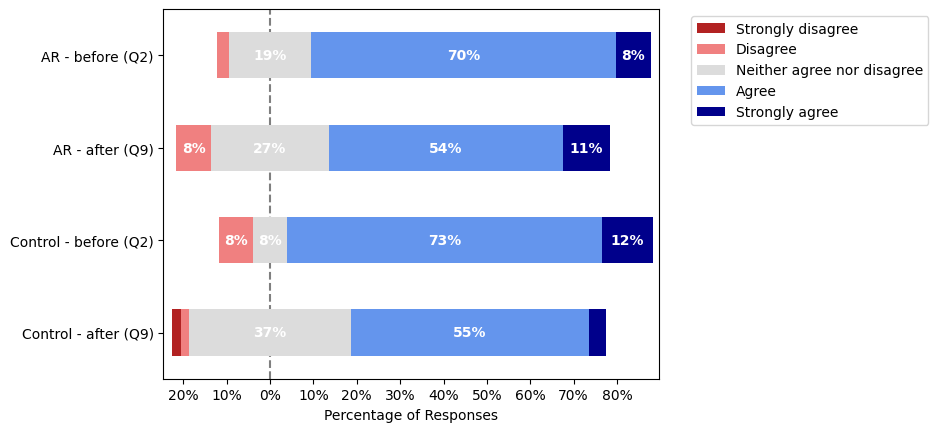

In [150]:
plot_likert.plot_likert(pd.DataFrame({'AR - before (Q2)':dataARSuccess['ReprodAloneNormScale'],
                                      'AR - after (Q9)':dataARSuccess['SelfPerformanceNormScale'],
                                      'Control - before (Q2)':dataControlSuccess['ReprodAloneNormScale'],
                                      'Control - after (Q9)':dataControlSuccess['SelfPerformanceNormScale']}), normalizedCat, bar_labels = True, plot_percentage=True)

plt.show()

In [151]:
between_group_data = pd.DataFrame({"Group": ['AR','Control'],"Before mean": [dataARSuccess["ReprodAloneEncoded"].mean(), dataControlSuccess["ReprodAloneEncoded"].mean()], "Before SD": [dataARSuccess["ReprodAloneEncoded"].std() , dataControlSuccess["ReprodAloneEncoded"].std()], "After mean": [dataARSuccess["SelfPerformanceEncoded"].mean(), dataControlSuccess["SelfPerformanceEncoded"].mean()], "After SD": [dataARSuccess["SelfPerformanceEncoded"].std(), dataControlSuccess["SelfPerformanceEncoded"].std()] }) 

mannwhitneyu_list_p = []
mannwhitneyu_list_z = []
mannwhitneyu_list_effect_size = []
#AR
mwu_res = pg.mwu(dataARSuccess["ReprodAloneEncoded"], dataARSuccess["SelfPerformanceEncoded"])
mannwhitneyu_list_p.append(mwu_res['p-val']['MWU'])
mannwhitneyu_list_z.append(z_value(dataARSuccess["ReprodAloneEncoded"], dataARSuccess["SelfPerformanceEncoded"], mwu_res['U-val']['MWU']))
mannwhitneyu_list_effect_size.append(mwu_res['CLES']['MWU'])

#Control 

mwu_res = pg.mwu(dataControlSuccess["ReprodAloneEncoded"], dataControlSuccess["SelfPerformanceEncoded"])
mannwhitneyu_list_p.append(mwu_res['p-val']['MWU'])
mannwhitneyu_list_z.append(z_value(dataControlSuccess["ReprodAloneEncoded"], dataControlSuccess["SelfPerformanceEncoded"], mwu_res['U-val']['MWU']))
mannwhitneyu_list_effect_size.append(mwu_res['CLES']['MWU'])

between_group_data['p-value'] = mannwhitneyu_list_p
between_group_data['z-value'] = mannwhitneyu_list_z
between_group_data['effect size'] = mannwhitneyu_list_effect_size


between_group_data.round(2)

,Group,Before mean,Before SD,After mean,After SD,p-value,z-value,effect size
0,AR,3.84,0.60,3.68,0.78,0.34,0.82,0.56
1,Control,3.88,0.71,3.57,0.70,0.01,2.32,0.63


### Within group with inexperienced particpants

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\Lib\site-packages\plot_likert\plot_likert.py:314: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


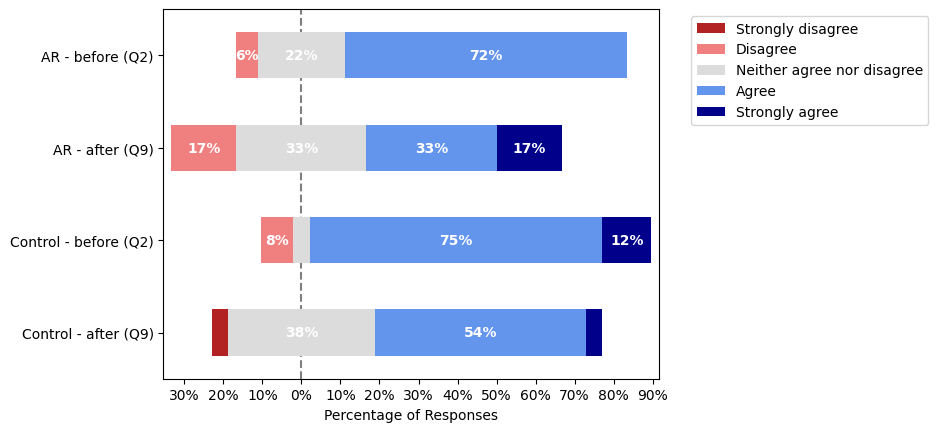

In [152]:
plot_likert.plot_likert(pd.DataFrame({'AR - before (Q2)':ARgpNoExpAtAll['ReprodAloneNormScale'],
                                      'AR - after (Q9)':ARgpNoExpAtAll['SelfPerformanceNormScale'],
                                      'Control - before (Q2)':ctlGpNoExpAtAll['ReprodAloneNormScale'],
                                      'Control - after (Q9)':ctlGpNoExpAtAll['SelfPerformanceNormScale']}), normalizedCat, bar_labels = True, plot_percentage=True)

plt.show()

In [153]:
between_group_data_NoExAtAll = pd.DataFrame({"Group": ['AR','Control'],"Before mean": [ARgpNoExpAtAll["ReprodAloneEncoded"].mean(), ctlGpNoExpAtAll["ReprodAloneEncoded"].mean()], "Before SD": [ARgpNoExpAtAll["ReprodAloneEncoded"].std() , ctlGpNoExpAtAll["ReprodAloneEncoded"].std()], "After mean": [ARgpNoExpAtAll["SelfPerformanceEncoded"].mean(), ctlGpNoExpAtAll["SelfPerformanceEncoded"].mean()], "After SD": [ARgpNoExpAtAll["SelfPerformanceEncoded"].std(), ctlGpNoExpAtAll["SelfPerformanceEncoded"].std()] }) 

mannwhitneyu_list_p_NoExAtAll = []
mannwhitneyu_list_z_NoExAtAll = []
mannwhitneyu_list_effect_size_NoExAtAll = []
#AR
mwu_res = pg.mwu(ARgpNoExpAtAll["ReprodAloneEncoded"], ARgpNoExpAtAll["SelfPerformanceEncoded"])
mannwhitneyu_list_p_NoExAtAll.append(mwu_res['p-val']['MWU'])
mannwhitneyu_list_z_NoExAtAll.append(z_value(ARgpNoExpAtAll["ReprodAloneEncoded"], ARgpNoExpAtAll["SelfPerformanceEncoded"], mwu_res['U-val']['MWU']))
mannwhitneyu_list_effect_size_NoExAtAll.append(mwu_res['CLES']['MWU'])

#Control 

mwu_res = pg.mwu(ctlGpNoExpAtAll["ReprodAloneEncoded"], ctlGpNoExpAtAll["SelfPerformanceEncoded"])
mannwhitneyu_list_p_NoExAtAll.append(mwu_res['p-val']['MWU'])
mannwhitneyu_list_z_NoExAtAll.append(z_value(ctlGpNoExpAtAll["ReprodAloneEncoded"], ctlGpNoExpAtAll["SelfPerformanceEncoded"], mwu_res['U-val']['MWU']))
mannwhitneyu_list_effect_size_NoExAtAll.append(mwu_res['CLES']['MWU'])

between_group_data_NoExAtAll['p-value'] = mannwhitneyu_list_p_NoExAtAll
between_group_data_NoExAtAll['z-value'] = mannwhitneyu_list_z_NoExAtAll
between_group_data_NoExAtAll['effect size'] = mannwhitneyu_list_effect_size_NoExAtAll


between_group_data_NoExAtAll.round(3)

,Group,Before mean,Before SD,After mean,After SD,p-value,z-value,effect size
0,AR,3.667,0.594,3.500,0.985,0.509,0.617,0.560
1,Control,3.917,0.717,3.542,0.779,0.036,1.794,0.651
